# Fields Academy | Western University
### Neural Networks, Assignment 3
### Evan Callaghan
### April 21, 2023

### Problem 2. b)

In [2]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import imageio

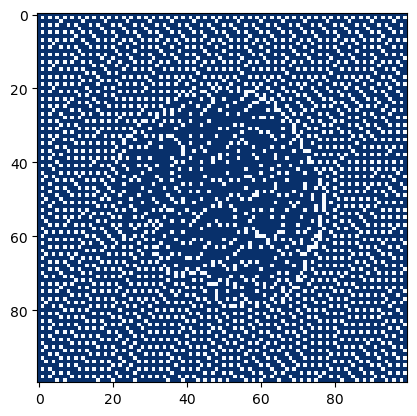

In [3]:
## i. Loading the image and turning it into a numpy array with +/-1 entries
img = Image.open('memory1-1.png')

## Setting some helpful parameters
image_width = 100
image_height = 100
N = 10000
max_iterations = 80

## Resizing the image to be 100x100
img = img.resize((image_width, image_height))

## Binarizing the image
img = img.convert('1')

## Converting image to a numpy array
img_array = np.array(img)

## Displaying the image
plt.imshow(img_array, cmap = 'Blues')
plt.show()

In [4]:
## ii.  Flattening this array into a 1 × 100^2 array
v = img_array.flatten()
v = np.where(v == True, 1, -1)

## iii. Using the provided definition to find the weight matrix 

## Initializing the weight matrix
weight_matrix = np.zeros((N, N))

## Computing the weight matrix
weight_matrix = (1/float(N)) * np.outer(v,v)

## FIlling diagonal with zeros 
np.fill_diagonal(weight_matrix, 0)

In [5]:
## iv. Performing a state update and computing the energy function at each step

## Creating initial array
state = np.random.randint(0, 2, size = N)
state = np.where(state == 0, -1, 1)

## Initializing arrays to store images and energy values
images = np.array([])
energy = np.array([])

for i in range(max_iterations):
    
    ## Storing state vector
    images = np.append(images,state)
    
    ## Storing energy value
    energy = np.append(energy, -0.5 * np.dot(np.dot(state, weight_matrix), state))
    
    ## Updating a random set of 1000 neurons
    for j in np.random.choice(np.arange(0, N, 1), size = 1000, replace = False):
        state[j] = np.sign(np.dot(weight_matrix[j,:], state))

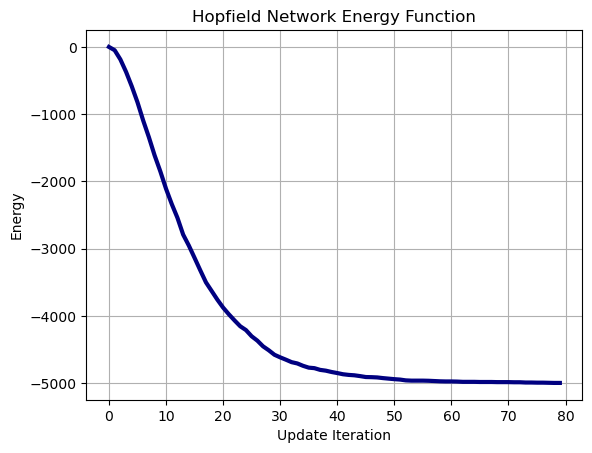

In [6]:
## v. Plotting the energy function

## Creating x-axis range
x = np.arange(0, max_iterations)

## Creating energy function plot
plt.plot(x, energy, linewidth = 3, color = 'navy')
plt.title('Hopfield Network Energy Function')
plt.xlabel('Update Iteration')
plt.ylabel('Energy')
plt.grid()
plt.show()

In plotting the energy function we can see that it is non-increasing at each time step and converges after about 60 iterations or updates. When I implemented the Hopfield network using a syncronous update method, I was seeing convergence in about two iterations, so I wanted to add some randomness to the updating process (reasoning behind the 'np.random.choice(np.arange(0, N, 1), size = 1000, replace = False)') which increases the number of time steps before convergence. 

In [ ]:
## vi. Combining the images of all time steps to create a GIF

## Reshaping the images array
images = np.reshape(images, (max_iterations, image_width, image_height))

## Defining function to store images
def create_frames(t):
    fig = plt.figure(figsize = (6, 6))
    plt.matshow(images[t], cmap = 'Blues' )
    plt.title(f'Iteration: {t}')
    plt.savefig(f'Images/img_{t}.png', transparent = False)
    plt.close()
    
## Creating the frames
for time in x:
    create_frames(time)
    
## Opening the images
frames = []
for t in x:
    image = imageio.v2.imread(f'Images/img_{t}.png')
    frames.append(image)
    
## Storing the gif
imageio.mimsave('memory.gif', frames, fps = 15)  

## Displaying the gif:

<img src = 'memory.gif' width = '500' align = 'center'>